*De La Salle University – Dasmarinas*\
*College of Information and Computer Studies*

*S–CSIS311 — Introduction to Machine Learning*\
**Instructor:** Rolando B. Barrameda

**Name:** Luis Anton P. Imperial\
**Course / Year / Section:** BCS32

## Given:

In [1]:
from numpy import random, array

In [2]:
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float64
import numpy as np

In [4]:
data = createClusteredData(100, 5)
model = KMeans(n_clusters=5)
model = model.fit(scale(data))

In [5]:
print(model.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0 0 4 4 4]


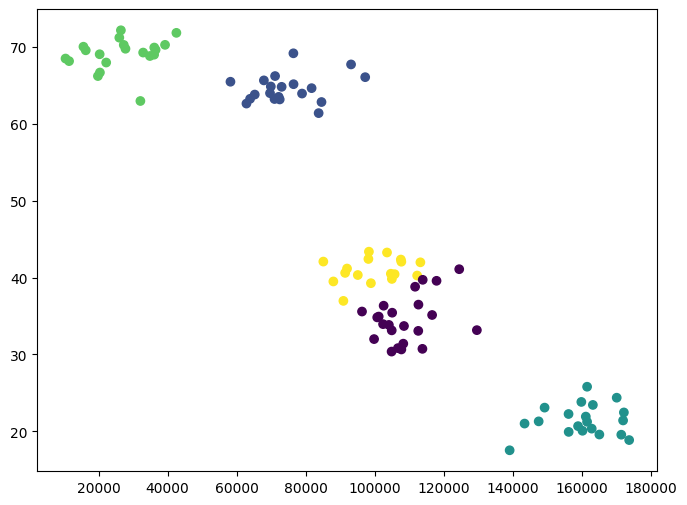

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float64))
plt.show()

## Questions:

1. What happens if you don't scale the data?
2. What happens if you choose a different k (number of clusters)?
3. Make a new prediction. Which cluster does it belong to?

## Experiments:

### Experiment 1 – Unscaled Data

In [25]:
def plot_model_results(model, data=data, show_centroids=True):
    plt.figure(figsize=(8,6))
    
    unique_labels = np.unique(model.labels_)
    
    # Plot each cluster with a unique color and label
    for label in unique_labels:
        cluster_points = data[model.labels_ == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50)
    
    # Plot centroids if show_centroids is True
    if show_centroids:
        centers = model.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    plt.legend(loc='upper right')
    plt.xlabel('Income')
    plt.ylabel('Age')
    plt.title('Clustered Data with KMeans')
    plt.show()

[4 1 4 4 4 4 1 4 1 4 1 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 3 2 2 2 2 3 2 1 2 2 2 2 2 2 2 2 2 2]


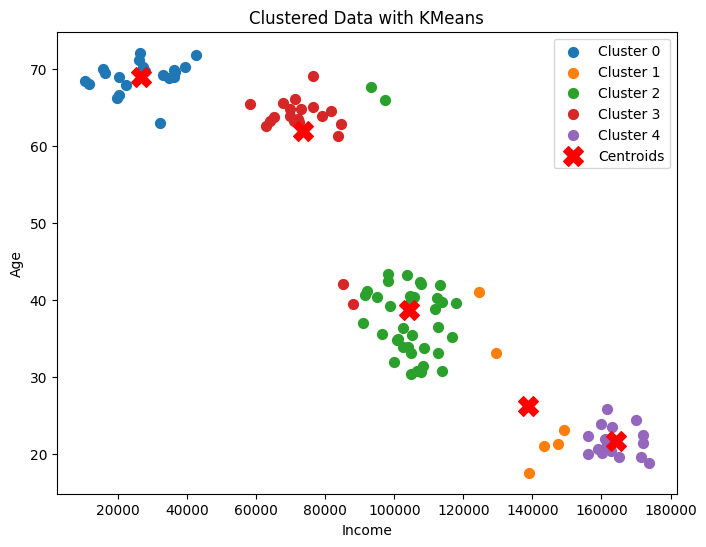

In [18]:
modelUnscaled = KMeans(n_clusters=5)
modelUnscaled.fit(data)
print(modelUnscaled.labels_)

plot_model_results(modelUnscaled)

### Experiment 2 – Different k (Quantity of Clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


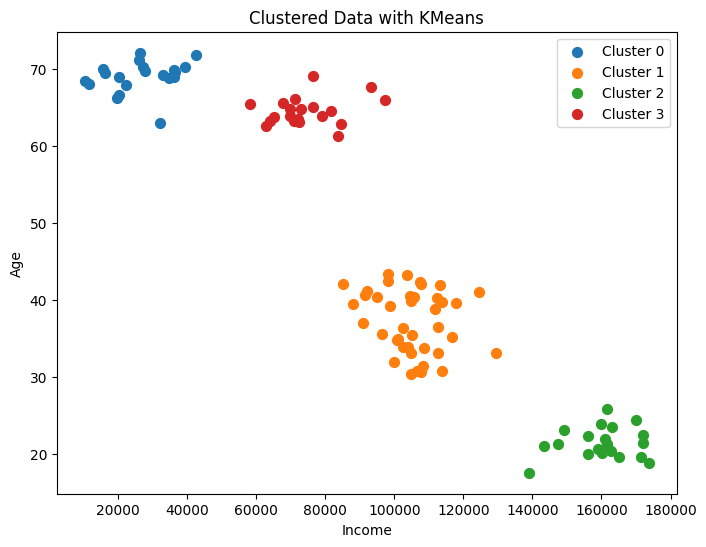

In [26]:
model3_smallerK = KMeans(n_clusters=4)
model3_smallerK = model3_smallerK.fit(scale(data))
print(model3_smallerK.labels_)

plot_model_results(model3_smallerK, data, show_centroids=False)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 6 5 5 5 1 1 1 5 5 1 1 5 1 5 5
 5 1 1 5 5 5 0 6 0 6 0 6 6 0 6 6 6 0 6 0 0 6 6 6 0 0]


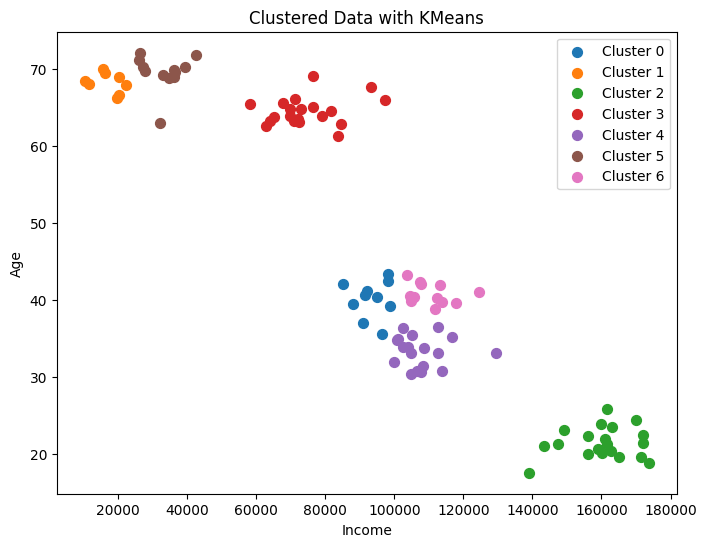

In [27]:
model4_biggerK = KMeans(n_clusters=7)
model4_biggerK.fit(scale(data))
print(model4_biggerK.labels_)

plot_model_results(model4_biggerK, data, show_centroids=False)

### Experiment 3 – Making A New Prediction

Make a new prediction with a new dataset. Which cluster does it belong to?

[0 4 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 3 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 4 4
 4 4 4 4 4 4 4 4 4 4 4]


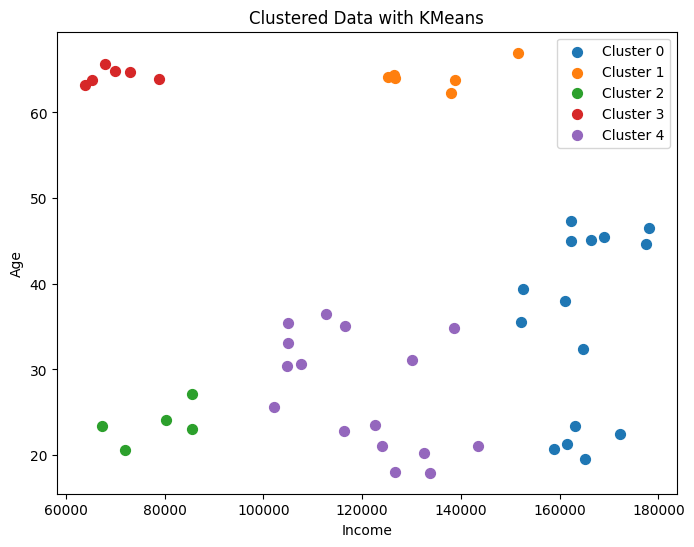

In [28]:
data2 = createClusteredData(50, 8)
model5_newPrediction = KMeans(n_clusters=5)
model5_newPrediction.fit(scale(data2))
print(model5_newPrediction.labels_)

plot_model_results(model5_newPrediction, data2, show_centroids=False)

In [29]:
model5_newPrediction.predict([[150000,37]])[0]

0

A data item consisting of **$150,000** and an **age of 37** yields a prediction of it belonging to **Cluster 0** — the set of items on the bottom-right with the richest and youngest group of people.